In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import string
import re
from os import listdir
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding
import numpy as np
import nltk
from keras.layers import Conv1D, MaxPooling1D
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def load_doc(filename):
  file = open(filename, 'r' )
  text = file.read()
  file.close()
  return text

In [ ]:
text = load_doc('/content/drive/MyDrive/review_polarity/review_polarity/txt_sentoken/neg/cv000_29416.txt')

In [ ]:
text

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [ ]:
def clean_doc(doc):
  tokens = doc.split()
  re_punc = re.compile( '[%s]' % re.escape(string.punctuation))
  tokens = [re_punc.sub( '' , w) for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  stop_words = set(stopwords.words( 'english' ))
  tokens = [w for w in tokens if not w in stop_words]
  tokens = [word for word in tokens if len(word) > 1]
  return tokens

In [ ]:
clean_doc(text)

['plot',
 'two',
 'teen',
 'couples',
 'go',
 'church',
 'party',
 'drink',
 'drive',
 'get',
 'accident',
 'one',
 'guys',
 'dies',
 'girlfriend',
 'continues',
 'see',
 'life',
 'nightmares',
 'whats',
 'deal',
 'watch',
 'movie',
 'sorta',
 'find',
 'critique',
 'mindfuck',
 'movie',
 'teen',
 'generation',
 'touches',
 'cool',
 'idea',
 'presents',
 'bad',
 'package',
 'makes',
 'review',
 'even',
 'harder',
 'one',
 'write',
 'since',
 'generally',
 'applaud',
 'films',
 'attempt',
 'break',
 'mold',
 'mess',
 'head',
 'lost',
 'highway',
 'memento',
 'good',
 'bad',
 'ways',
 'making',
 'types',
 'films',
 'folks',
 'didnt',
 'snag',
 'one',
 'correctly',
 'seem',
 'taken',
 'pretty',
 'neat',
 'concept',
 'executed',
 'terribly',
 'problems',
 'movie',
 'well',
 'main',
 'problem',
 'simply',
 'jumbled',
 'starts',
 'normal',
 'downshifts',
 'fantasy',
 'world',
 'audience',
 'member',
 'idea',
 'whats',
 'going',
 'dreams',
 'characters',
 'coming',
 'back',
 'dead',
 'others',

In [ ]:
def doc_to_line(filename, vocab):
  doc = load_doc(filename)
  tokens = clean_doc(doc)
  tokens = [w for w in tokens if w in vocab]
  return ' ' .join(tokens)

In [ ]:
vocab = open('/content/vocab.txt')
vocab = vocab.read().split()

In [ ]:
text = doc_to_line('/content/drive/MyDrive/review_polarity/review_polarity/txt_sentoken/neg/cv000_29416.txt',
                   vocab)

In [ ]:
text

'plot two teen couples go church party drink drive get accident one guys dies girlfriend continues see life nightmares whats deal watch movie sorta find critique mindfuck movie teen generation touches cool idea presents bad package makes review even harder one write since generally applaud films attempt break mold mess head lost highway memento good bad ways making types films folks didnt snag one correctly seem taken pretty neat concept executed terribly problems movie well main problem simply jumbled starts normal downshifts fantasy world audience member idea whats going dreams characters coming back dead others look like dead strange apparitions disappearances chase scenes tons weird things happen simply explained personally dont mind trying unravel film every give clue get kind fed films biggest problem obviously got big secret hide seems want hide completely final five minutes make things entertaining thrilling even engaging meantime really sad part arrow dig flicks like actually 

In [ ]:
def process_train(directory, vocab):
  documents = list()
  for filename in listdir(directory):
    if not filename.startswith( 'cv9' ):
      path = directory + '/' + filename
      doc = load_doc(path)
      tokens = clean_doc(doc, vocab)
      documents.append(tokens)
  return documents

def process_test(directory, vocab):
  documents = list()
  for filename in listdir(directory):
    if filename.startswith( 'cv9' ):
      path = directory + '/' + filename
      doc = load_doc(path)
      tokens = clean_doc(doc, vocab)
      documents.append(tokens)
  return documents

In [ ]:
# load all docs in a directory
def process_docs(directory, vocab, is_train):
  documents = list()
  for filename in listdir(directory):
    if is_train and filename.startswith( 'cv9' ):
      continue
    if not is_train and not filename.startswith( 'cv9' ):
      continue
    path = directory + '/' + filename
    # load the doc
    doc = load_doc(path)
    tokens = clean_doc(doc)
    documents.append(tokens)
  return documents

In [ ]:
lines = process_docs('/content/drive/MyDrive/review_polarity/review_polarity/txt_sentoken/pos',
                     vocab, False)

In [ ]:
len(lines)

100

In [ ]:
def load_clean_dataset(vocab, is_train):
  neg = process_docs('/content/drive/MyDrive/review_polarity/review_polarity/txt_sentoken/neg', vocab, is_train)
  pos = process_docs('/content/drive/MyDrive/review_polarity/review_polarity/txt_sentoken/pos', vocab, is_train)
  docs = neg + pos
  labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
  return docs, labels

In [ ]:
train, train_labels = load_clean_dataset(vocab, True)
test, test_labels = load_clean_dataset(vocab, False)

In [ ]:
len(train), len(test)

(1810, 200)

Build the DNN model

In [ ]:
def define_model(n_words):
  model = Sequential()
  model.add(Dense(50, input_shape=(n_words,), activation= 'relu' ))
  model.add(Dense(1, activation= 'sigmoid' ))
  # compile network
  model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' ,
                metrics=[ 'accuracy' ])
  model.summary()
  plot_model(model, to_file= 'model.png' , show_shapes=True)
  return model

In [ ]:
d=train+test

In [ ]:
# fit a tokenizer
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [ ]:
tokenizer=create_tokenizer(d)

In [ ]:
x_train=tokenizer.texts_to_matrix(d,mode='binary')

In [ ]:
x_train.shape

(2010, 46558)

In [ ]:
x_train.shape

(2010, 46558)

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 1.]])

In [ ]:
tokenizer.word_docs

defaultdict(int,
            {'akiva': 7,
             'expensive': 42,
             'battle': 152,
             'robin': 113,
             'tons': 20,
             'save': 230,
             'limp': 14,
             'try': 258,
             'fist': 10,
             'idiocy': 8,
             'tragic': 51,
             'one': 1750,
             'moisture': 1,
             'equation': 10,
             'comes': 588,
             'could': 876,
             'theres': 623,
             'almost': 590,
             'without': 538,
             'uma': 22,
             'whatever': 130,
             'cure': 21,
             'dying': 68,
             'knows': 242,
             'established': 45,
             'switch': 29,
             'death': 298,
             'joel': 48,
             'film': 1734,
             'losing': 54,
             'gough': 10,
             'far': 475,
             'nothing': 593,
             'pat': 33,
             'completely': 354,
             'vamps': 4,
             '

In [ ]:
+
# define network
n_words = x_train.shape[1]
model = define_model(n_words)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2327950   
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2328001 (8.88 MB)
Trainable params: 2328001 (8.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model

In [ ]:
l= train_labels+test_labels
model.fit(x_train, np.array(l), epochs=10, batch_size=10)

Epoch 1/10
201/201 [==============================] - 5s 3ms/step - loss: 0.4148 - accuracy: 0.8040
Epoch 2/10
201/201 [==============================] - 1s 3ms/step - loss: 0.0276 - accuracy: 0.9945
Epoch 3/10
201/201 [==============================] - 1s 3ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 4/10
201/201 [==============================] - 1s 4ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 5/10
201/201 [==============================] - 1s 5ms/step - loss: 7.1706e-04 - accuracy: 1.0000
Epoch 6/10
201/201 [==============================] - 1s 4ms/step - loss: 3.4878e-04 - accuracy: 1.0000
Epoch 7/10
201/201 [==============================] - 1s 4ms/step - loss: 2.1583e-04 - accuracy: 1.0000
Epoch 8/10
201/201 [==============================] - 1s 3ms/step - loss: 1.4860e-04 - accuracy: 1.0000
Epoch 9/10
201/201 [==============================] - 1s 3ms/step - loss: 1.0799e-04 - accuracy: 1.0000
Epoch 10/10
201/201 [==============================] - 1s 3ms/step - loss: 8.163

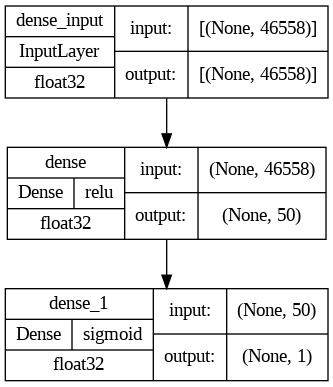

In [ ]:
plot_model(model, show_dtype=True, show_layer_activations=True,
           show_shapes=True, show_layer_names=True )

In [ ]:
def predict_sentiment(review):
  tokens = clean_doc(review)
  tokens = [w for w in tokens if w in vocab]
  line = ' ' .join(tokens)
  # encode
  encoded = tokenizer.texts_to_matrix([line], mode= 'binary' )
  yhat = model.predict(encoded, verbose=0)
  percent_pos = yhat[0,0]
  if round(percent_pos) == 0:
    return (1-percent_pos), 'NEGATIVE'
  return percent_pos, 'POSITIVE'

In [ ]:
# test positive text
text = ' Best movie ever! It was great, I will definitely recommend it. '
percent, sentiment = predict_sentiment(text)
print( ' Review: [%s]\nSentiment: %s (%.3f%%) ' % (text, sentiment, percent*100))

 Review: [ Best movie ever! It was great, I will definitely recommend it. ]
Sentiment: POSITIVE (62.892%) 


In [ ]:
# test negative text
text = ' This is a bad movie. '
percent, sentiment = predict_sentiment(text)
print( ' Review: [%s]\nSentiment: %s (%.3f%%) ' % (text, sentiment, percent*100))

 Review: [ This is a bad movie. ]
Sentiment: NEGATIVE (64.863%) 
